In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
plt.rcParams.update({'figure.figsize':(6,4),'figure.dpi':60})

In [2]:
pth = r"/Users/christianugwu/Desktop/AQUAFEED DATA Tilapia CURRENT.xlsx"

In [3]:
earthen_data = pd.read_excel(pth, sheet_name='EarthenData')

In [4]:
earthen_data.head()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
0,6.80,27.90,6.80,40.26,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,50.216
1,6.79,28.02,6.80,47.91,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,53.840
2,6.73,26.62,6.74,51.26,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,66.472
3,6.83,26.92,6.84,56.30,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,81.460
4,6.76,25.52,6.77,60.60,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,98.360


In [5]:
earthen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dissolve_oxygen   39 non-null     float64
 1   Temperature       39 non-null     float64
 2   PH                39 non-null     float64
 3   Feed_intake       39 non-null     float64
 4   Fish_meal         39 non-null     float64
 5   Blood_meal        39 non-null     float64
 6   Palm_kernel_cake  39 non-null     int64  
 7   Water_fern        39 non-null     int64  
 8   Wheat_meal        39 non-null     int64  
 9   Mopane_worm       39 non-null     int64  
 10  Soya_bean_meal    39 non-null     float64
 11  Yellow_maize      39 non-null     float64
 12  Soya_bean_oil     39 non-null     int64  
 13  Starch            39 non-null     int64  
 14  Vitamin           39 non-null     int64  
 15  Methionine        39 non-null     int64  
 16  Lysine            39 non-null     int64  
 17 

In [6]:
earthen_data.describe()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.0,39.000000,39.000000,39.000000,39.000000
mean,6.778462,26.668205,6.735128,109.582051,3.633333,10.833333,4.333333,3.000000,6.333333,6.666667,16.600000,25.300000,5.333333,2.0,2.0,3.333333,3.333333,7.300000,165.786872
std,0.063889,0.720449,0.156051,56.356744,5.205480,15.520925,6.208370,4.298102,9.073772,9.551339,13.568617,0.894721,0.477567,0.0,0.0,2.387835,2.387835,10.458716,97.289471
min,6.580000,25.300000,6.300000,39.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.400000,5.000000,2.0,2.0,0.000000,0.000000,0.000000,49.824000
25%,6.750000,26.070000,6.745000,58.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.400000,5.000000,2.0,2.0,0.000000,0.000000,0.000000,78.928000
50%,6.790000,26.820000,6.790000,103.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.000000,5.000000,2.0,2.0,5.000000,5.000000,0.000000,135.320000
75%,6.830000,27.120000,6.840000,158.555000,10.900000,32.500000,13.000000,9.000000,19.000000,20.000000,32.800000,26.500000,6.000000,2.0,2.0,5.000000,5.000000,21.900000,243.536000
max,6.860000,28.020000,6.870000,215.900000,10.900000,32.500000,13.000000,9.000000,19.000000,20.000000,32.800000,26.500000,6.000000,2.0,2.0,5.000000,5.000000,21.900000,351.752000


In [7]:
def boxplot(column):
    sns.boxplot(data= earthen_data,x=earthen_data[f"{column}"])
    plt.title(f"Boxplot of Earthen Data {column}")
    plt.show()

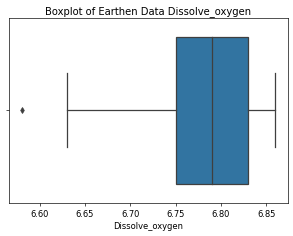

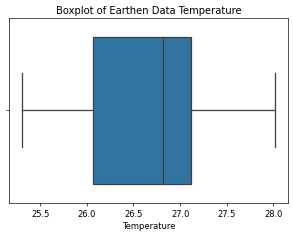

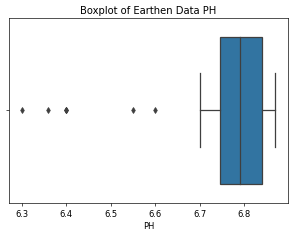

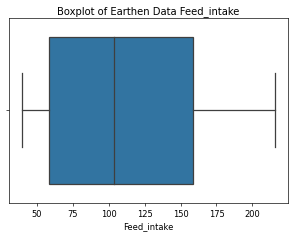

In [8]:
boxplot('Dissolve_oxygen')
boxplot('Temperature')
boxplot('PH')
boxplot('Feed_intake')

In [9]:
def histgram(column):
    #sns.histplot(data2["price"],kde=True)
    sns.histplot(data= earthen_data,x=earthen_data[f"{column}"], kde = True)
    plt.title(f"Histgram plot of Earthen Data {column}")
    plt.show()

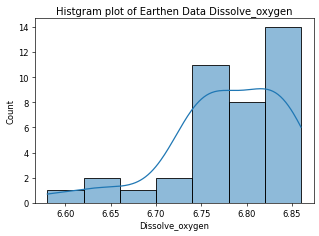

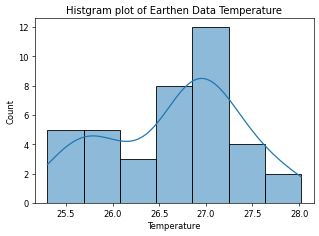

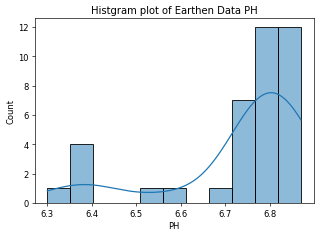

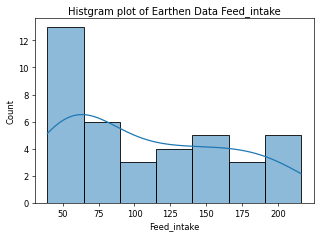

In [10]:
histgram('Dissolve_oxygen')
histgram('Temperature')
histgram('PH')
histgram('Feed_intake')

In [11]:
# skewness along the index axis 
earthen_data.skew(axis = 0, skipna = True) 

Dissolve_oxygen    -1.160668
Temperature        -0.251708
PH                 -1.717323
Feed_intake         0.422102
Fish_meal           0.735711
Blood_meal          0.735711
Palm_kernel_cake    0.735711
Water_fern          0.735711
Wheat_meal          0.735711
Mopane_worm         0.735711
Soya_bean_meal     -0.046582
Yellow_maize        0.489357
Soya_bean_oil       0.735711
Starch              0.000000
Vitamin             0.000000
Methionine         -0.735711
Lysine             -0.735711
Groundnut_cake      0.735711
Weight_gain         0.507944
dtype: float64

In [12]:
# Calculate the correlation matrix
correlation_matrix = earthen_data.corr()
correlation_matrix

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
Dissolve_oxygen,1.000000,0.129606,0.629017,-0.137477,0.086250,0.025875,0.025875,0.025875,-0.112125,-0.112125,0.032482,-0.006905,0.086250,NaN,NaN,-0.086250,-0.086250,0.086250,-0.157473
Temperature,0.129606,1.000000,0.203866,-0.404079,0.132575,-0.272798,-0.272798,-0.272798,0.140223,0.140223,0.236951,-0.260871,0.132575,NaN,NaN,-0.132575,-0.132575,0.132575,-0.385515
PH,0.629017,0.203866,1.000000,-0.484964,0.008239,0.082393,0.082393,0.082393,-0.090633,-0.090633,-0.044717,0.063329,0.008239,NaN,NaN,-0.008239,-0.008239,0.008239,-0.519191
Feed_intake,-0.137477,-0.404079,-0.484964,1.000000,-0.116547,0.067733,0.067733,0.067733,0.048813,0.048813,-0.105340,0.091555,-0.116547,NaN,NaN,0.116547,0.116547,-0.116547,0.987531
Fish_meal,0.086250,0.132575,0.008239,-0.116547,1.000000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,0.855273,-0.720577,1.000000,NaN,NaN,-1.000000,-1.000000,1.000000,-0.007223
Blood_meal,0.025875,-0.272798,0.082393,0.067733,-0.500000,1.000000,1.000000,1.000000,-0.500000,-0.500000,-0.876391,0.960769,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,-0.027070
Palm_kernel_cake,0.025875,-0.272798,0.082393,0.067733,-0.500000,1.000000,1.000000,1.000000,-0.500000,-0.500000,-0.876391,0.960769,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,-0.027070
Water_fern,0.025875,-0.272798,0.082393,0.067733,-0.500000,1.000000,1.000000,1.000000,-0.500000,-0.500000,-0.876391,0.960769,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,-0.027070
Wheat_meal,-0.112125,0.140223,-0.090633,0.048813,-0.500000,-0.500000,-0.500000,-0.500000,1.000000,1.000000,0.021118,-0.240192,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,0.034293
Mopane_worm,-0.112125,0.140223,-0.090633,0.048813,-0.500000,-0.500000,-0.500000,-0.500000,1.000000,1.000000,0.021118,-0.240192,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,0.034293


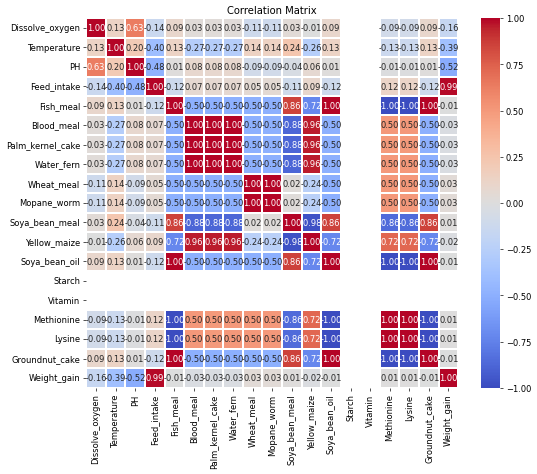

In [13]:
# plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix') 
# displaying heatmap 
plt.show() 

### Descriptive Analysis Inference
1. The highest weight gain is 713.568200.
2. The lowest weight gain is 24.807600.
3. The total number of observations is 39 with no missing value.
4. Most of the weight fall in the range of 0 to 100.
5. Average weight is 330.02.
6. The temperature range from 25 to 27 and the median was 26.4
7. Most of the temperature fall in the range of 26.4 and 26.7.
8. From above box plot its clear that there is no outlier in 'Weight_gain'  and 'temperature' data
9. There is high correlation between weight_gain and feed intake which is 0.9997.
10. The highest feed intake was 747.57 and the lowest was 34.8
11. Average dissolve oxygen was 5.13, the highest was 5.61 and lowest was 4.31

### Predictive Analysis

In [14]:
features = earthen_data.drop(['Weight_gain'], axis =1)
features.head()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake
0,6.80,27.90,6.80,40.26,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
1,6.79,28.02,6.80,47.91,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
2,6.73,26.62,6.74,51.26,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
3,6.83,26.92,6.84,56.30,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
4,6.76,25.52,6.77,60.60,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9


In [15]:
label = earthen_data[['Weight_gain']]
label.head()

,Weight_gain
0,50.216
1,53.840
2,66.472
3,81.460
4,98.360


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(features, label, test_size =0.2, random_state = 42) 

print('X_train dimension', X_train.shape)
print('X_test dimension', X_test.shape)
print('y_train dimension', y_train.shape)
print('y_test dimension', y_test.shape)

X_train dimension (31, 18)
X_test dimension (8, 18)
y_train dimension (31, 1)
y_test dimension (8, 1)


In [17]:
X_text_df = pd.DataFrame(X_test)
y_text_df = pd.DataFrame(y_test)
y_text_df

,Weight_gain
33,178.952
36,282.632
4,98.360
13,52.232
30,102.796
26,49.824
6,135.320
27,58.180


#### Linear Regression

In [18]:
from sklearn import linear_model
model_reg = linear_model.LinearRegression()
# Train the Linear regression model
model_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions on the test set
y_pred = model_reg.predict(X_test)

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Print the model coefficients and evaluation metrics
print(f'Coefficients: {model_reg.coef_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Coefficients: [[ 6.70444898e+01 -4.03459003e+00 -4.59987581e+01  1.66481536e+00
   1.31997192e-01 -2.83627576e-01 -1.13451030e-01 -7.85430209e-02
  -6.42738043e-02 -6.76566361e-02  3.39694419e-01 -2.03564040e-02
   1.21098341e-02  0.00000000e+00  0.00000000e+00 -6.05491706e-02
  -6.05491706e-02  2.65205367e-01]]
Mean Squared Error: 178.0910690827707
R-squared: 0.9678114719133311


In [21]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = model_reg.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
#print(predicted)
predicted.rename(columns={0:'Linear Regression Prediction'}, inplace=True)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  Linear Regression Prediction
0      178.952                    184.696979
1      282.632                    273.683337
2       98.360                    100.881383
3       52.232                     18.235380
4      102.796                    101.506289
5       49.824                     61.391203
6      135.320                    138.797401
7       58.180                     56.779352


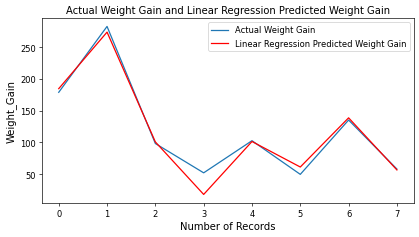

In [22]:
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and Linear Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['Linear Regression Prediction'],'r')
plt.legend(['Actual Weight Gain','Linear Regression Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [23]:
# Create and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=30)
tree_params = {"max_depth": range(1, 11), "max_features": range(2, 50)}
tree_grid = GridSearchCV(regressor, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", tree_grid.best_params_)
print("Best Accuracy:", tree_grid.best_score_)

# Train and evaluate the model with the best hyperparameters
best_dt = DecisionTreeRegressor(max_depth=tree_grid.best_params_['max_depth'],
                                 max_features=tree_grid.best_params_['max_features'])
best_dt.fit(X_train, y_train)
# Make predictions on the test set
y_pred = best_dt.predict(X_test)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Hyperparameters: {'max_depth': 5, 'max_features': 17}
Best Accuracy: 0.9104484731708986


In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 520.2234764999996
R-squared: 0.9059737915499727


In [25]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = best_dt.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'Descision Tree Regressor Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  Descision Tree Regressor Prediction
0      178.952                              136.316
1      282.632                              248.072
2       98.360                               83.410
3       52.232                               59.884
4      102.796                              120.384
5       49.824                               66.472
6      135.320                              119.128
7       58.180                               53.840


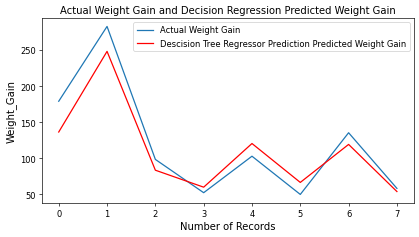

In [26]:
# visualize result of Decision Tree Regressor prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and Decision Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['Descision Tree Regressor Prediction'],'r')
plt.legend(['Actual Weight Gain','Descision Tree Regressor Prediction Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [33]:
### Create a Pickle file
import pickle
pickle_out = open("DT_Tilapia_Earthen.pkl","wb")
pickle.dump(best_dt, pickle_out)
pickle_out.close()

In [27]:
# Create and train the K-Nearest Neighbors Regression model
knn_reg = KNeighborsRegressor() 

# Define the hyperparameter grid
param_grid = {'n_neighbors': np.arange(1, 20),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Define the grid search object
knn_grid = GridSearchCV(knn_reg, param_grid, cv=5)

knn_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", knn_grid.best_params_)
print("Best Accuracy:", knn_grid.best_score_)

# Train and evaluate the model with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors=knn_grid.best_params_['n_neighbors'],
                                 weights=knn_grid.best_params_['weights'],
                                 algorithm=knn_grid.best_params_['algorithm'],
                                 p=knn_grid.best_params_['p'])
best_knn.fit(X_train, y_train)
# Make predictions on the test set
y_pred = best_knn.predict(X_test)

Best Hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Best Accuracy: 0.9721644757204169


In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 187.38076979876462
R-squared: 0.9661324332397266


In [30]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = best_knn.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'KNN Regressor Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  KNN Regressor Prediction
0      178.952                180.708922
1      282.632                282.600923
2       98.360                 84.536521
3       52.232                 71.563773
4      102.796                 97.142740
5       49.824                 67.320830
6      135.320                118.959350
7       58.180                 76.218379


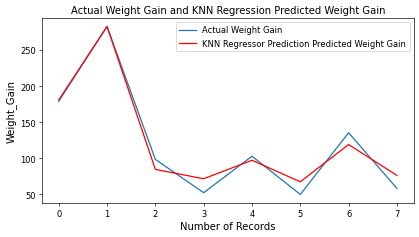

In [31]:
# visualize result of KNN Regressor prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and KNN Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['KNN Regressor Prediction'],'r')
plt.legend(['Actual Weight Gain','KNN Regressor Prediction Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [38]:
### Create a Pickle file
import pickle
pickle_out = open("KNN_Tilapia_Earthen.pkl","wb")
pickle.dump(best_knn, pickle_out)
pickle_out.close()

In [32]:
import warnings
warnings.filterwarnings("ignore")
# Create and train the MLP Regression model
ann_reg = MLPRegressor(hidden_layer_sizes= (50,), random_state=42,
                       alpha = 0.0005, activation = 'relu', 
                       solver = 'adam', max_iter= 100000)

ann_reg.fit(X_train, y_train)

MLPRegressor(alpha=0.0005, hidden_layer_sizes=(50,), max_iter=100000,
             random_state=42)

In [33]:
# Make predictions on the test set
y_pred = ann_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 38.057584416950135
R-squared: 0.9931213977701127


In [34]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
pred_train= ann_reg.predict(X_train)
print('mean_squared_error for Training: ',np.sqrt(mean_squared_error(y_train,pred_train)))
pred= ann_reg.predict(X_test)
print('mean_squared_error for Testing: ', np.sqrt(mean_squared_error(y_test,pred)))

mean_squared_error for Training:  1.7844906023505553
mean_squared_error for Testing:  6.169082947809191


In [35]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = ann_reg.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'ANN Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  ANN Prediction
0      178.952      178.591944
1      282.632      283.369165
2       98.360       98.026185
3       52.232       43.140326
4      102.796      104.762923
5       49.824       37.198478
6      135.320      142.293296
7       58.180       55.160362


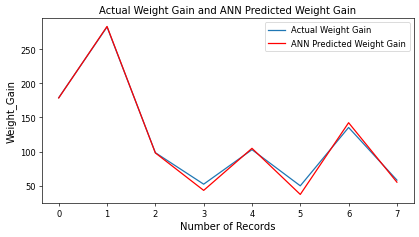

In [36]:
# visualize result of ANN prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and ANN Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['ANN Prediction'],'r')
plt.legend(['Actual Weight Gain','ANN Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [37]:
# Save
import pickle
pickle_out = open("ANN_Tilapia_Earthen_ext.pkl","wb")
pickle.dump(ann_reg, pickle_out)
pickle_out.close()

In [38]:
from sklearn.ensemble import RandomForestRegressor
# Fitting Random Forest Regression to the dataset
RFregressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
RFregressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [39]:
# Make predictions on the test set
y_pred = RFregressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 136.53536140000006
R-squared: 0.9753223317829328


In [ ]:
from keras.models import Sequential
from keras.layers import Dense# Neural network
model = Sequential()
model.add(Dense(500, input_dim=4, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model.fit(X_train, y_train, batch_size = 1, validation_split=0.2, epochs= 3000)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
pred_train= model.predict(X_train)
print('mean_squared_error for Training: ',np.sqrt(mean_squared_error(y_train,pred_train)))
pred= model.predict(X_test)
print('mean_squared_error for Testing: ', np.sqrt(mean_squared_error(y_test,pred)))

In [ ]:
# "Loss"
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = model.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'ANN Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

In [ ]:
# visualize result of ANN prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and ANN Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['ANN Prediction'],'r')
plt.legend(['Actual Weight Gain','ANN Predicted Weight Gain'], loc = 'upper right')
plt.show()